Diabetes prediction model with Balanced Data

This model was built with balanced dataset provided by https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators. It has an imbalance class where the 97 percent is overfit to class 0. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, 1 is for prediabetes and 2 for diabetes. This dataset has 21 feature variables and is balanced.

In [ ]:
#install libraries
!pip install mlxtend imblearn inflect

#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
import inflect
import os

**Download Dataset**

In [ ]:
!wget 'https://docs.google.com/uc?export=download&id=1Kk44I2sr69GEvlog5uhhyYHL-dSnshBy' -O health_data_imbalanced.csv

--2024-12-17 18:06:24--  https://docs.google.com/uc?export=download&id=1Kk44I2sr69GEvlog5uhhyYHL-dSnshBy
Resolving docs.google.com (docs.google.com)... 142.251.179.102, 142.251.179.113, 142.251.179.101, ...
Connecting to docs.google.com (docs.google.com)|142.251.179.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Kk44I2sr69GEvlog5uhhyYHL-dSnshBy&export=download [following]
--2024-12-17 18:06:24--  https://drive.usercontent.google.com/download?id=1Kk44I2sr69GEvlog5uhhyYHL-dSnshBy&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.115.132, 2607:f8b0:4004:c1f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.115.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22738151 (22M) [application/octet-stream]
Saving to: 'health_data_imbalanced.csv'

health_data_imbalan 100%[===================>]  21.

**Load dataset into Pandas**

In [ ]:
health_data =  pd.read_csv('health_data_imbalanced.csv')

**Get the dataset columns, datatypes**

In [ ]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
health_data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

**Get columns with null values**

In [ ]:
health_data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

**Check if the dataset have any duplicates**

In [ ]:
health_data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
253675    False
253676    False
253677    False
253678    False
253679    False
Length: 253680, dtype: bool

**If any duplicates are present keep the last occurrence**

In [ ]:
health_data.duplicated(keep='last')

0         False
1         False
2         False
3         False
4         False
          ...  
253675    False
253676    False
253677    False
253678    False
253679    False
Length: 253680, dtype: bool

**calculates and visualizes the correlation between each feature in the dataset and the target variable (Diabetes_012)**

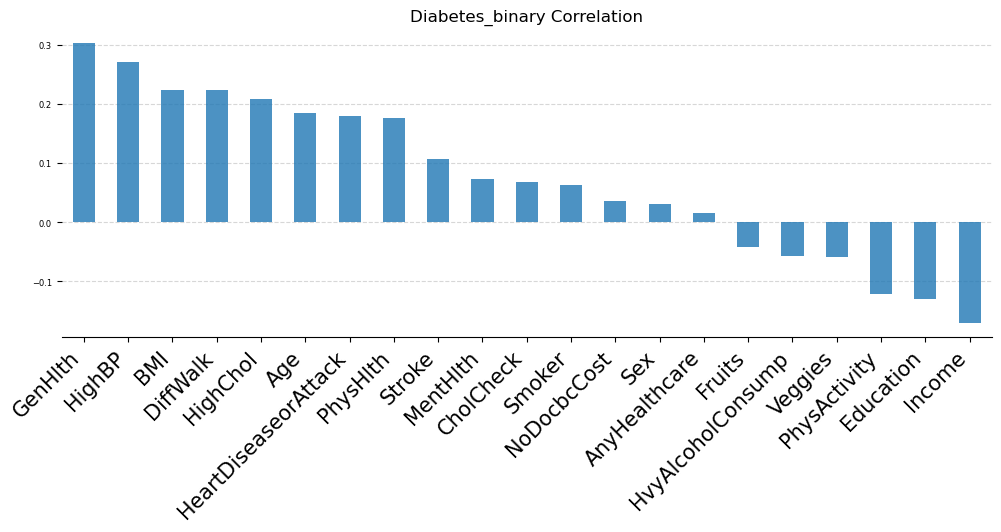

In [ ]:
(health_data.drop('Diabetes_012', axis=1)
   .corrwith(health_data.Diabetes_012)
   .sort_values(ascending=False)
   .plot(kind='bar', figsize=(12, 4), title="Diabetes_binary Correlation", alpha=0.8, zorder=3)
   .spines[['top','right', 'left']].set_visible(False)
   )
plt.grid(axis='y', linestyle='--', alpha=.5)
plt.xticks(rotation = 45, ha='right', size=15);

**This variables have more correlated with the target variable Diabetes_binary**

* GenHlth
* HighBP
* DiffWalk
* BMI
* HighChol
* Age
* HeartDiseaseorAttack
* PhysHlth
* Physactivity
* Education
* Income

**This variables that have a very weak correlation**

* AnyHealthcare
* NoDocbcCost
* Fruits
* Sex
* Smoker
* Veggies

Check outliers for the selected features  and detect if the outlier is greater than or less than 3 to replace outliers with median. In this case outliers will be detected on the columns

```
'BMI', 'MentHlth', 'PhysActivity', 'Age', 'Income'
```


In [ ]:
# Step 1: Copy the dataset
health_data_copy = health_data.copy()

# Step 2: Define columns for outlier detection
columns_to_check = ['BMI', 'MentHlth', 'PhysActivity', 'Age', 'Income']

# Step 3: Calculate Z-scores and replace outliers dynamically
for col in columns_to_check:
    # Calculate Z-scores for the column
    z_scores = zscore(health_data_copy[col])

    # Detect outliers (Z-score > 3 or < -3)
    outlier_indices = health_data_copy.index[np.abs(z_scores) > 3]

    # Calculate the median excluding outliers
    non_outlier_median = health_data_copy.loc[np.abs(z_scores) <= 3, col].median()

    # Replace outliers with the median of non-outliers
    health_data_copy.loc[outlier_indices, col] = non_outlier_median

**Descriptive statistics of health data set**

In [ ]:
health_data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.010679,5.576425,12.0,24.0,27.0,31.0,48.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


**Create Graphs after removing outliers**

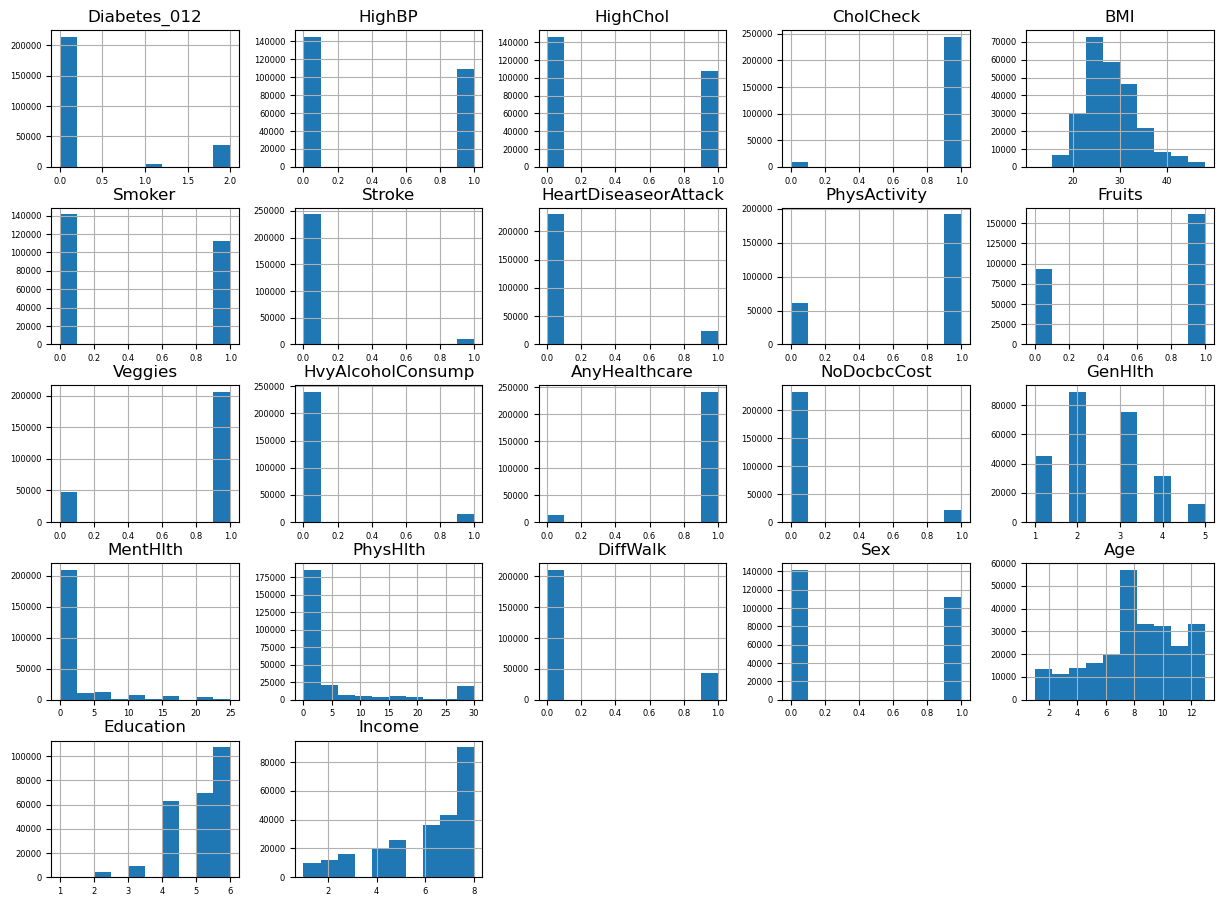

In [ ]:
#histograms to inspect data
plt.rc('font', size=12)
plt.rc('axes', labelsize=12, titlesize=12)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=6)

health_data_copy.hist(bins=10, figsize=(15, 11))
plt.show()

In [ ]:
def plot_multiple_boxplots(df, columns=None):

    if columns is None:
        columns = df.select_dtypes(include='number').columns.tolist()

    df_melted = df[columns].melt(var_name='Feature', value_name='Value')

    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Feature', y='Value', data=df_melted)
    plt.title('Boxplots of Health Data')
    plt.xticks(rotation=45)
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.show()

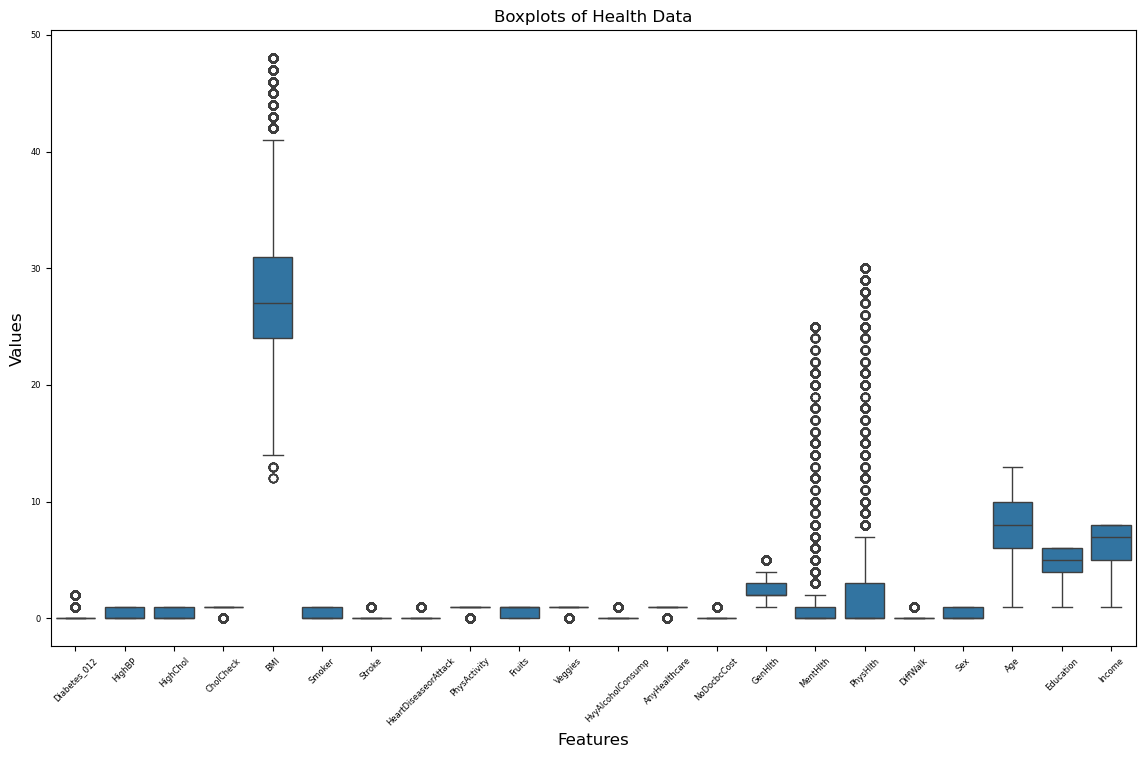

In [ ]:
#plot all features to identify outliers
plot_multiple_boxplots(health_data_copy)

**Correlation Matrix to understand features**

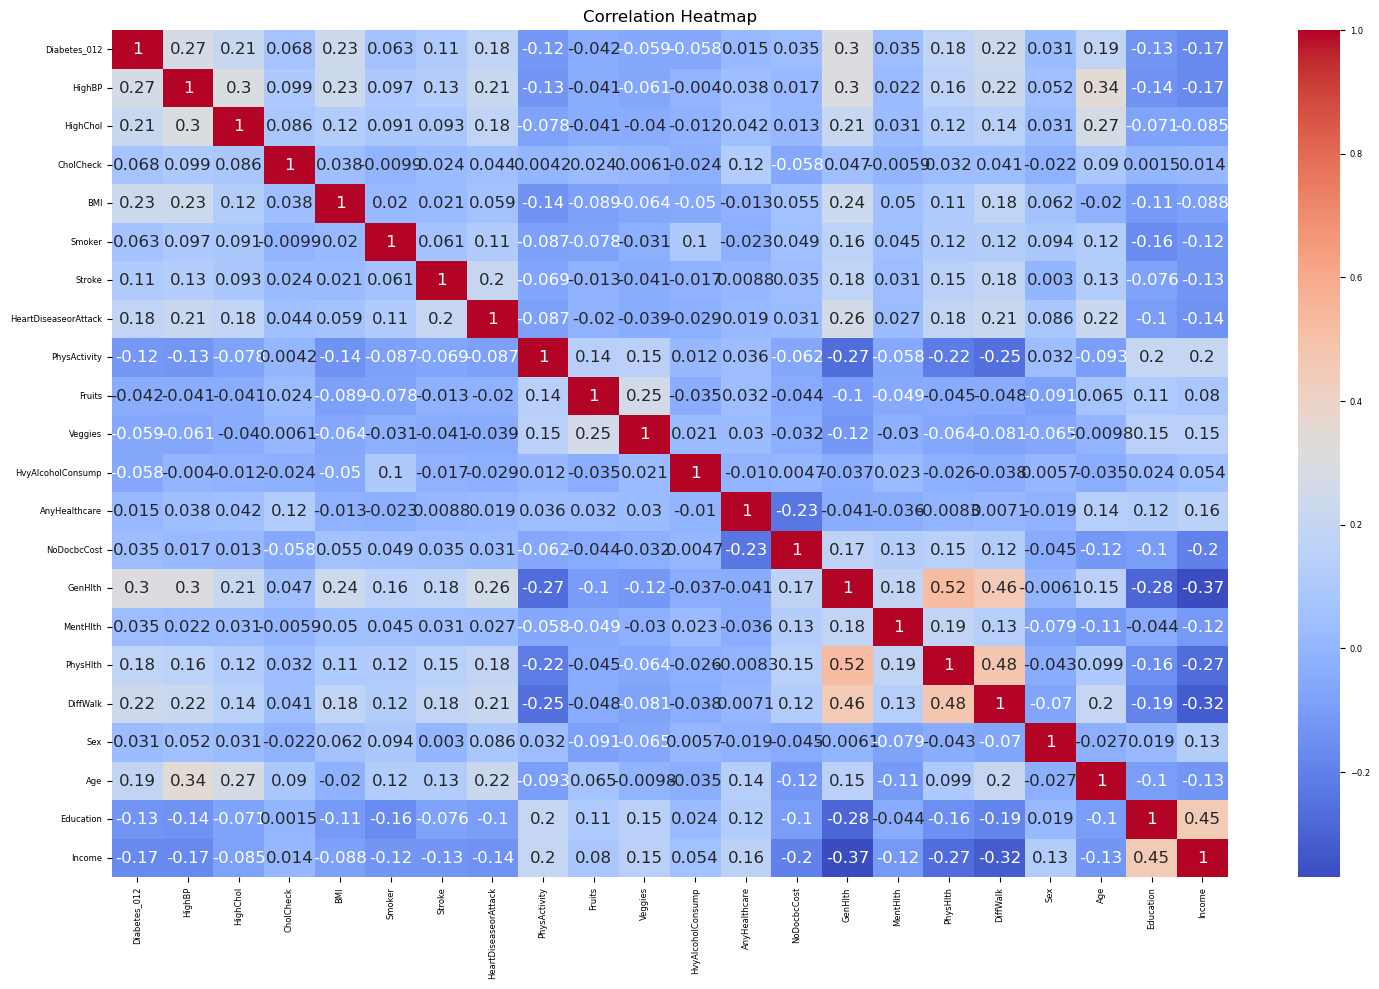

In [ ]:
#correlation heat map
plt.figure(figsize=(18, 11))
sns.heatmap(health_data_copy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Feature Engineering**
* **Combine Fruits and Veggies into HealthyDiet:**

     *HealthyDiet is created as the sum of Fruits and Veggies.
Redundant features (Fruits and Veggies) are dropped using inplace=True

* **Physical Health Interaction:**

    * PhysicalHealthIndex retains the PhysHlth column as is.
Note: Avoids interaction (e.g., subtraction with MentHlth) to keep the original value.

* **Interaction Between BMI and Age:**

     *A new interaction feature BMI_Age is created as the product of BMI and Age.

* ** Aggregate Risk Factors:**

    * RiskFactorScore aggregates key risk indicators (binary features):
HighBP, HighChol, HeartDiseaseorAttack, and Stroke.
This combined feature serves as a composite score for overall health risk.

**Numerical Feature Standardization:**
   * A list of numerical features is defined:
['BMI', 'Age', 'HealthyDiet', 'PhysicalHealthIndex', 'RiskFactorScore', 'BMI_Age', 'DiffWalk_Education']

* The StandardScaler standardizes these numerical features to ensure consistent scaling and to improve model performance.

**Dropping Low-Importance Features:**
    * The following features are dropped as they are considered low-importance:
CholCheck, AnyHealthcare, HvyAlcoholConsump, MentHlth, and PhysHlth


In [ ]:
#Combine Fruits and Veggies into HealthyDiet
health_data_copy['HealthyDiet'] = health_data_copy['Fruits'] + health_data_copy['Veggies']
health_data_copy.drop(columns=['Fruits', 'Veggies'], inplace=True)  # Drop redundant features

#Physical Health Interaction
health_data_copy['PhysicalHealthIndex'] = health_data_copy['PhysHlth']  # Retain as is; avoid subtraction with MentHlth

#Interaction between BMI and Age (keep)
health_data_copy['BMI_Age'] = health_data_copy['BMI'] * health_data_copy['Age']

#Aggregate Risk Factors (Retain and Update)
health_data_copy['RiskFactorScore'] = (
    health_data_copy['HighBP'] +
    health_data_copy['HighChol'] +
    health_data_copy['HeartDiseaseorAttack'] +
    health_data_copy['Stroke']
)

#Add Interaction Features with DiffWalk and Education
health_data_copy['DiffWalk_Education'] = health_data_copy['DiffWalk'] * health_data_copy['Education']

# Update Numerical Features
numerical_features = ['BMI', 'Age', 'HealthyDiet', 'PhysicalHealthIndex',
                      'RiskFactorScore', 'BMI_Age', 'DiffWalk_Education']

# Standardize Important Numerical Features
scaler = StandardScaler()
health_data_copy[numerical_features] = scaler.fit_transform(health_data_copy[numerical_features])

# Drop Low-Importance Features
low_importance_features = ['CholCheck', 'AnyHealthcare', 'HvyAlcoholConsump', 'MentHlth', 'PhysHlth']
health_data_copy.drop(columns=low_importance_features, inplace=True)

#Validate Changes
print(health_data_copy.info())
print(health_data_copy.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Stroke                253680 non-null  float64
 6   HeartDiseaseorAttack  253680 non-null  float64
 7   PhysActivity          253680 non-null  float64
 8   NoDocbcCost           253680 non-null  float64
 9   GenHlth               253680 non-null  float64
 10  DiffWalk              253680 non-null  float64
 11  Sex                   253680 non-null  float64
 12  Age                   253680 non-null  float64
 13  Education             253680 non-null  float64
 14  Income                253680 non-null  float64
 15  

In [ ]:
health_data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,2.969213e-01,0.698160,0.000000,0.000000,0.000000,0.000000,2.000000
HighBP,253680.0,4.290011e-01,0.494934,0.000000,0.000000,0.000000,1.000000,1.000000
HighChol,253680.0,4.241209e-01,0.494210,0.000000,0.000000,0.000000,1.000000,1.000000
BMI,253680.0,-2.083900e-17,1.000002,-2.871142,-0.719222,-0.181242,0.536065,3.584619
Smoker,253680.0,4.431686e-01,0.496761,0.000000,0.000000,0.000000,1.000000,1.000000
Stroke,253680.0,4.057080e-02,0.197294,0.000000,0.000000,0.000000,0.000000,1.000000
HeartDiseaseorAttack,253680.0,9.418559e-02,0.292087,0.000000,0.000000,0.000000,0.000000,1.000000
PhysActivity,253680.0,7.565437e-01,0.429169,0.000000,1.000000,1.000000,1.000000,1.000000
NoDocbcCost,253680.0,8.417692e-02,0.277654,0.000000,0.000000,0.000000,0.000000,1.000000
GenHlth,253680.0,2.511392e+00,1.068477,1.000000,2.000000,2.000000,3.000000,5.000000


In [ ]:
health_data_copy['Diabetes_012'].value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

**Balanced Dataset:**

  * SMOTETomek oversamples minority classes and removes borderline samples for cleaner data.

**Standardized Features:**
   * Feature scaling ensures that PCA and ML models are not biased by differing feature scales.

**Dimensionality Reduction:**
  * PCA reduces the number of features while preserving most of the information, improving model training time and performance.


In [ ]:
from imblearn.over_sampling import RandomOverSampler
# Split the data
X = health_data_copy.drop('Diabetes_012', axis=1)
y = health_data_copy['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#initialize SMOTETomek
smote = SMOTETomek(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardize features post-ADASYN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [ ]:
# Check class distribution
print("Class distribution in the original data:")
print(y.value_counts(normalize=True))  # Original distribution

print("\nClass distribution in the training set:")
print(y_train.value_counts(normalize=True))  # Train distribution

print("\nClass distribution in the test set:")
print(y_test.value_counts(normalize=True))  # Test distribution

Class distribution in the original data:
Diabetes_012
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: proportion, dtype: float64

Class distribution in the training set:
Diabetes_012
0.0    0.842410
2.0    0.139334
1.0    0.018256
Name: proportion, dtype: float64

Class distribution in the test set:
Diabetes_012
0.0    0.842420
2.0    0.139329
1.0    0.018251
Name: proportion, dtype: float64


In [ ]:
print(pca.explained_variance_ratio_)

[0.24149864 0.11518682 0.07689803 0.07043792 0.06237838 0.05917345
 0.04958992 0.04779642 0.04187688 0.04141152 0.04066534 0.03704171
 0.03526637 0.03399684]


In [ ]:
from collections import Counter
# Assuming `y_resampled` is the target after applying SMOTE or ADASYN
class_distribution_resampled = Counter(y_test)

# Display class distribution
print("Class Distribution after Resampling:", class_distribution_resampled)


Class Distribution after Resampling: Counter({0.0: 42741, 2.0: 7069, 1.0: 926})


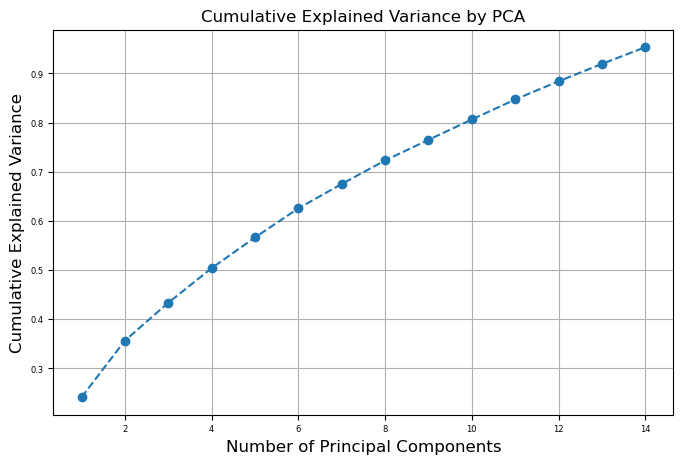

In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

* The cumulative variance steadily increases as more principal components are included.
* The curve starts with a sharp increase initially, indicating that the first few components capture the majority of variance.
* Around 10 components, the curve starts to flatten, indicating diminishing returns when adding more components.
* By 14 components, the cumulative explained variance surpasses 90%, suggesting that 14 components retain over 90% of the information in the original dataset.


In [ ]:
pca_components = pd.DataFrame(pca.components_, columns=X.columns)
print(pca_components.head())

     HighBP  HighChol       BMI    Smoker    Stroke  HeartDiseaseorAttack  \
0  0.276548  0.226971  0.169673  0.119497  0.156661              0.221620   
1  0.252097  0.239647  0.024034  0.002396  0.042822              0.142725   
2 -0.103529 -0.248548  0.194470 -0.186483 -0.228015             -0.247140   
3 -0.067150  0.057513 -0.253298 -0.031162  0.250159              0.244896   
4  0.016197 -0.016900  0.426935  0.193574 -0.199478             -0.056379   

   PhysActivity  NoDocbcCost   GenHlth  DiffWalk       Sex       Age  \
0     -0.183955     0.069858  0.323875  0.333844 -0.019455  0.210162   
1      0.168488    -0.292880 -0.213751 -0.260133  0.170345  0.389248   
2     -0.070404    -0.236590 -0.079329  0.291281 -0.220329  0.306777   
3      0.181300    -0.005409  0.009750  0.243263  0.104671 -0.134892   
4     -0.210023    -0.078443  0.054765  0.045697  0.553644 -0.227021   

   Education    Income  HealthyDiet  PhysicalHealthIndex   BMI_Age  \
0  -0.167970 -0.227909    -0.07709

In [ ]:
components = pca.components_
convert_digit = inflect.engine()
for component in range(0, len(components)):
    number_in_words = convert_digit.number_to_words(component)
    print(f"component: {number_in_words}")
    print("\n", components)
    print(f"{60*'='}")

component: zero
component: one
component: two
component: three
component: four
component: five
component: six
component: seven
component: eight
component: nine
component: ten
component: eleven
component: twelve
component: thirteen


**Adjust decision thresholds for class 1 and class 2 predictions.**
 *  Parameters:
        * probs: Predicted probabilities from model
        * threshold1: Custom threshold for class 1
        * threshold2: Custom threshold for class 2
 * Returns:
        * custom_preds: Array of predictions based on adjusted thresholds
  

In [ ]:
# Function to apply custom thresholds
def apply_custom_thresholds(probs, threshold1, threshold2):
    custom_preds = []
    for prob in probs:
        if prob[1] >= threshold1:  # Class 1 threshold
            custom_preds.append(1)
        elif prob[2] >= threshold2:  # Class 2 threshold
            custom_preds.append(2)
        else:  # Default to class 0
            custom_preds.append(0)
    return np.array(custom_preds)

**Random Forest Hyperparameter Grid (param_distributions_rf):**
```n_estimators:

Values: [100, 120]
Specifies the number of trees in the forest.
Moderate values are chosen for computational efficiency.
max_depth:

Values: [None]
Allows trees to grow to their full depth without limitation.
min_samples_split:

Values: [10, 15]
Minimum number of samples required to split a node.
Higher values prevent overfitting by controlling tree growth.
min_samples_leaf:

Values: [1, 5, 10]
Minimum number of samples required to be a leaf node.
Reduces overfitting by limiting small splits.
max_features:

Values: ['auto', 'sqrt', 'log2']
Determines the number of features considered for best split at each node.
bootstrap:

Values: [True]
Bootstrap sampling is used to train the trees (default behavior).
class_weight:

Values: [{0: 1.0, 1: 50.0, 2: 30.0}, {0: 1.0, 1: 60.0, 2: 25.0}]
Custom weights are applied to handle class imbalance.
Assigns higher importance to minority classes (Class 1 and Class 2).
```

**Decision Tree Hyperparameter Grid (param_distributions_dt):**
```
max_depth:
Values: [None]
Allows the tree to grow without restricting depth.
min_samples_split:

Values: [5, 10]
Controls when a node should be split, preventing overfitting.
criterion:

Values: ['gini', 'entropy']
Specifies the splitting criterion:
gini: Gini Impurity.
entropy: Information Gain.
```

In [ ]:
param_distributions_rf = {
    'n_estimators': [100, 120],  # Number of trees
    'max_depth': [None],  # Depth of the trees
    'min_samples_split': [10, 15],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 5, 10],  # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap': [True],  # Whether bootstrap samples are used when building trees
    'class_weight': [{0: 1.0, 1: 50.0, 2: 30.0},
                     {0: 1.0, 1: 60, 2: 25.0}]  # Custom class weights for handling imbalanced classes
}

param_distributions_dt = {
    'max_depth': [None],  # Focus on practical tree depths
    'min_samples_split': [5, 10],  # Reduce possible split thresholds
    'criterion': ['gini', 'entropy']  # Limit to common and effective criteria
}

# Define class weights and parameters
threshold_class1, threshold_class2 = 0.3, 0.4  # Custom thresholds

# RandomizedSearchCV for Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
random_search_dt = RandomizedSearchCV(
    estimator=dt_clf,
    param_distributions=param_distributions_dt,
    n_iter=7,
    scoring='f1_macro',
    cv=3,
    random_state=42,
    n_jobs=-1  # Utilize all available cores
)
random_search_dt.fit(X_train_pca, y_train_smote)

# Decision Tree predictions and probabilities
best_dt = random_search_dt.best_estimator_
dt_custom_preds = apply_custom_thresholds(
    best_dt.predict_proba(X_test_pca), threshold_class1, threshold_class2
)

# RandomizedSearchCV for Random Forest
rf_clf = RandomForestClassifier(class_weight=class_weights, random_state=42)
random_search_rf = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_distributions_rf,
    n_iter=7,
    scoring='f1_macro',
    cv=3,
    random_state=42,
    n_jobs=-1  # Utilize all available cores
)
random_search_rf.fit(X_train_pca, y_train_smote)

# Random Forest predictions and probabilities
best_rf = random_search_rf.best_estimator_
rf_custom_preds = apply_custom_thresholds(
    best_rf.predict_proba(X_test_pca), threshold_class1, threshold_class2
)

# Evaluation and Reporting
def evaluate_and_report(model_name, custom_preds, y_test):
    report = classification_report(y_test, custom_preds, output_dict=True)
    print(f"\n{model_name} Classification Report with Adjusted Threshold:")
    print(classification_report(y_test, custom_preds))
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, custom_preds),
        'F1 Score': f1_score(y_test, custom_preds, average='weighted')
    }

# Generate Reports for both models
dt_results = evaluate_and_report("Decision Tree (Custom Threshold)", dt_custom_preds, y_test)
rf_results = evaluate_and_report("Random Forest (Custom Threshold)", rf_custom_preds, y_test)

# Compare Results
results_comparison = pd.DataFrame([dt_results, rf_results])
print("\nModel Performance Comparison:")
print(results_comparison)

# Print Best Parameters
print("\nBest Parameters for Decision Tree:")
print(random_search_dt.best_params_)
print("\nBest Parameters for Random Forest:")
print(random_search_rf.best_params_)


Decision Tree (Custom Threshold) Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

         0.0       0.89      0.75      0.82     42741
         1.0       0.03      0.13      0.05       926
         2.0       0.27      0.43      0.33      7069

    accuracy                           0.69     50736
   macro avg       0.40      0.44      0.40     50736
weighted avg       0.79      0.69      0.73     50736


Random Forest (Custom Threshold) Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

         0.0       0.96      0.54      0.69     42741
         1.0       0.03      0.18      0.05       926
         2.0       0.25      0.72      0.37      7069

    accuracy                           0.56     50736
   macro avg       0.41      0.48      0.37     50736
weighted avg       0.84      0.56      0.63     50736


Model Performance Comparison:
                              Model  Accuracy

**Random forest obtained best parameters**
```{'n_estimators': 100, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'class_weight': {0: 1.0, 1: 60, 2: 25.0}, 'bootstrap': True}```

***
**Decision Tree best parameters**
```{'min_samples_split': 5, 'max_depth': None, 'criterion': 'entropy'}```
***
Conclusion:
Random Forest performed better with better recall and identifying false positves by sacrificing it's accuracy. Where as decision tree achieved high accuracy but failed at recall and identifying false positive.


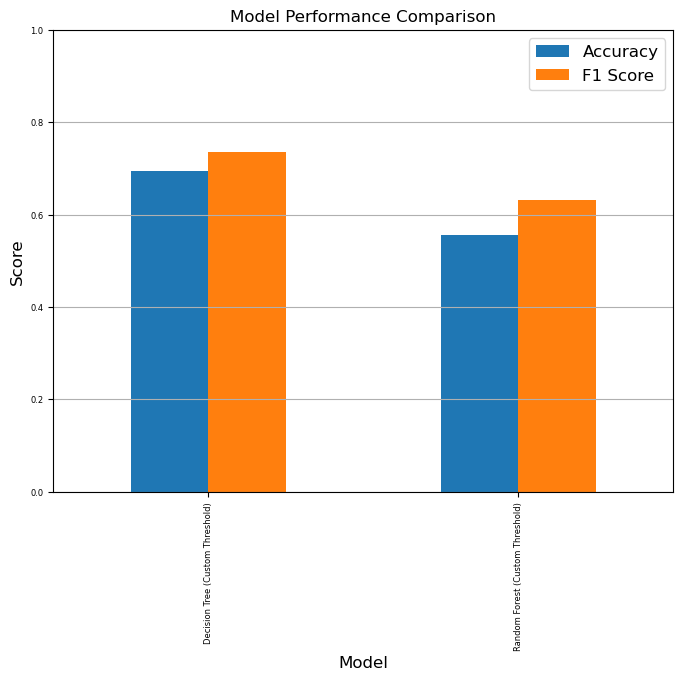

In [ ]:
# Visualize Comparison
results_comparison.set_index('Model').plot(kind='bar', figsize=(8, 6), ylim=(0, 1))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.grid(axis='y')
plt.show()

Accuracy score for Decision Tree is 69 and for Random Forests is 56

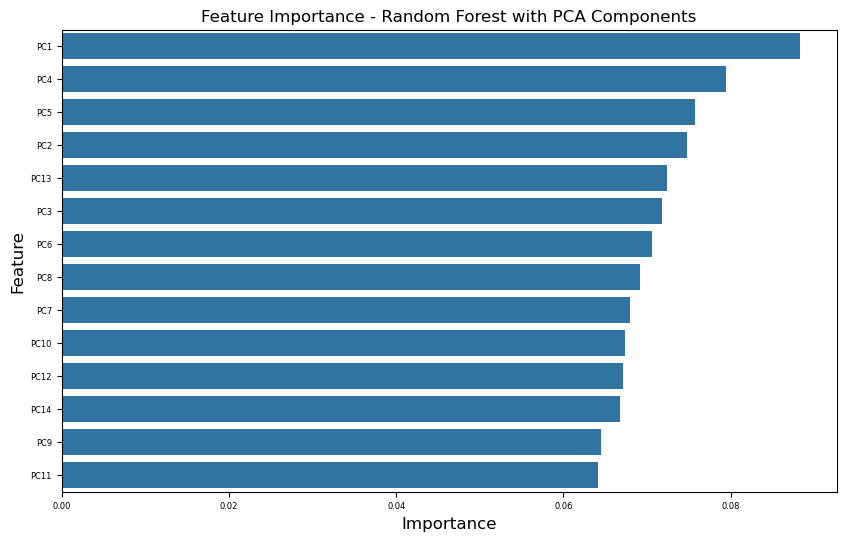

In [ ]:
# Feature Importance
# Ensure feature names match PCA-transformed data
feature_importance = best_rf.feature_importances_
pca_features = [f"PC{i+1}" for i in range(len(feature_importance))]  # Names for principal components

importance_rf = pd.DataFrame({'Feature': pca_features, 'Importance': feature_importance})
importance_rf = importance_rf.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_rf)
plt.title("Feature Importance - Random Forest with PCA Components")
plt.show()

**Model Focus:**
*  The Random Forest model relies heavily on PC1 through PC5, which capture significant patterns in the data.
* PCA components do not directly map to original features. They are linear combinations of the original features, which explains their ranking in terms of importance.


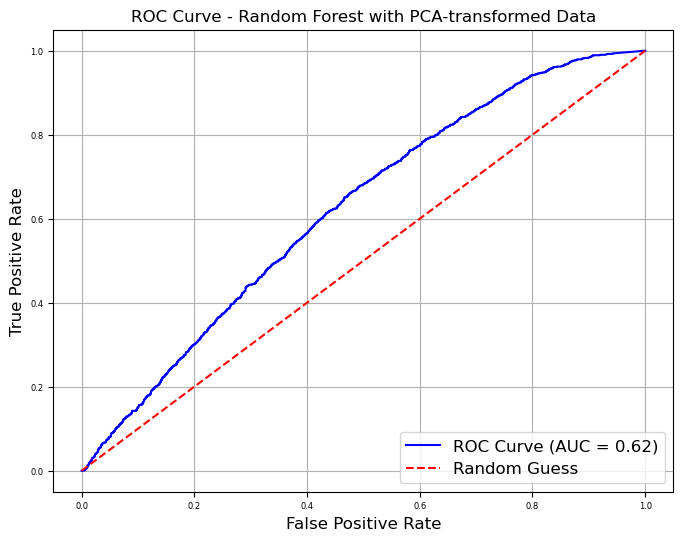

In [ ]:
rf_proba = best_rf.predict_proba(X_test_pca)[:, 1]  # Predict probabilities using PCA data
fpr, tpr, _ = roc_curve(y_test, rf_proba, pos_label=1)  # Adjust pos_label if needed
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='b')
plt.plot([0, 1], [0, 1], 'r--', label="Random Guess")
plt.title("ROC Curve - Random Forest with PCA-transformed Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

**ROC Curve for Random Forest is 0.62 which is acceptable**

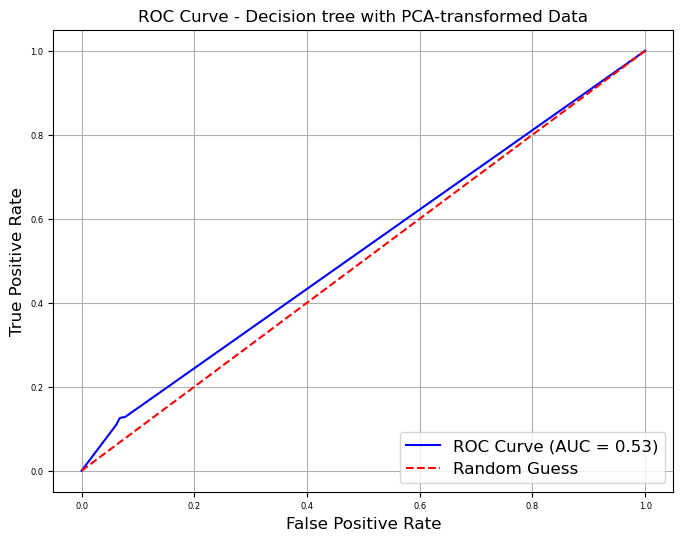

In [ ]:
dt_proba = best_dt.predict_proba(X_test_pca)[:, 1]  # Predict probabilities using PCA data
fpr, tpr, _ = roc_curve(y_test, dt_proba, pos_label=1)  # Adjust pos_label if needed
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='b')
plt.plot([0, 1], [0, 1], 'r--', label="Random Guess")
plt.title("ROC Curve - Decision tree with PCA-transformed Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

**ROC curve for Decison trees performed poorly with the value 0.53**

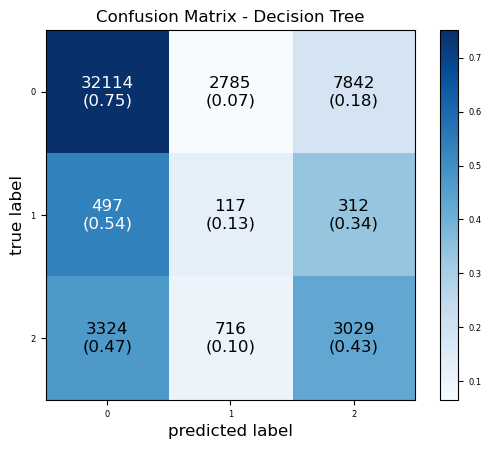

In [ ]:
# Confusion Matrix for Decision Tree
dt_cm = confusion_matrix(y_test, dt_custom_preds)
#disp_dt = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=np.unique(y_test))
#disp_dt.plot(cmap='Blues')
plot_confusion_matrix(conf_mat=dt_cm,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.title('Confusion Matrix - Decision Tree')
plt.show()

* False positives are higher because class 0 dominates the dataset and other classes (1 and 2) get misclassified as class 0.
* Class2 recall is 43 percent which is low compared to random forests.
* Class 2 has moderate precision but still produces false positives.


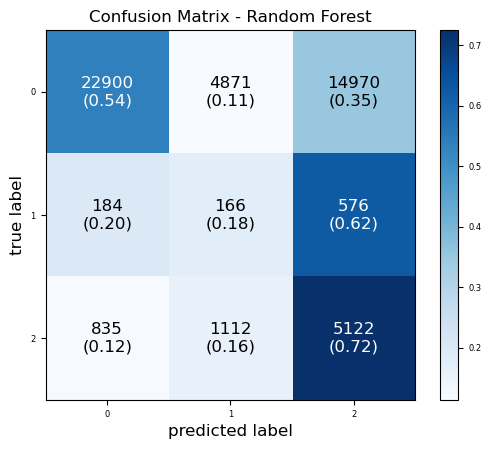

In [ ]:
# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_custom_preds)
plot_confusion_matrix(conf_mat=rf_cm,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.title('Confusion Matrix - Random Forest')
plt.show()

* Random Forest has better recall for class 2 (72%) compared to Decision Tree (43%).
* Class 2: 72% recall showing the model better identifies class 2 instances
* Class 1: Precision remains low due to a high number of false positives from class 0 or class 2.


In [ ]:
print(classification_report(y_test, dt_custom_preds))

              precision    recall  f1-score   support

         0.0       0.89      0.75      0.82     42741
         1.0       0.03      0.13      0.05       926
         2.0       0.27      0.43      0.33      7069

    accuracy                           0.69     50736
   macro avg       0.40      0.44      0.40     50736
weighted avg       0.79      0.69      0.73     50736



In [ ]:
print(classification_report(y_test, rf_custom_preds))

              precision    recall  f1-score   support

         0.0       0.96      0.54      0.69     42741
         1.0       0.03      0.18      0.05       926
         2.0       0.25      0.72      0.37      7069

    accuracy                           0.56     50736
   macro avg       0.41      0.48      0.37     50736
weighted avg       0.84      0.56      0.63     50736

